In [2]:
#! blockstart
import random
position = 0
walk = [position]
nsteps = 1000
for _ in range(nsteps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)
#! blockend
walk

[0,
 -1,
 0,
 1,
 0,
 1,
 2,
 1,
 2,
 3,
 4,
 3,
 4,
 3,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 0,
 1,
 2,
 1,
 0,
 1,
 0,
 1,
 0,
 -1,
 -2,
 -1,
 -2,
 -1,
 0,
 -1,
 -2,
 -1,
 0,
 -1,
 -2,
 -1,
 -2,
 -1,
 -2,
 -1,
 -2,
 -1,
 0,
 -1,
 0,
 -1,
 -2,
 -3,
 -2,
 -1,
 -2,
 -3,
 -2,
 -1,
 -2,
 -3,
 -2,
 -1,
 -2,
 -1,
 -2,
 -3,
 -4,
 -5,
 -4,
 -5,
 -6,
 -5,
 -4,
 -3,
 -2,
 -3,
 -2,
 -3,
 -4,
 -3,
 -4,
 -5,
 -4,
 -5,
 -4,
 -5,
 -4,
 -3,
 -2,
 -1,
 -2,
 -1,
 -2,
 -1,
 0,
 1,
 0,
 -1,
 -2,
 -3,
 -4,
 -3,
 -4,
 -5,
 -4,
 -3,
 -2,
 -3,
 -4,
 -5,
 -6,
 -5,
 -4,
 -5,
 -6,
 -7,
 -6,
 -7,
 -8,
 -9,
 -10,
 -11,
 -12,
 -11,
 -12,
 -13,
 -14,
 -15,
 -16,
 -17,
 -18,
 -17,
 -16,
 -15,
 -14,
 -13,
 -12,
 -13,
 -14,
 -15,
 -14,
 -15,
 -16,
 -17,
 -18,
 -17,
 -18,
 -19,
 -20,
 -21,
 -20,
 -21,
 -22,
 -21,
 -20,
 -21,
 -20,
 -21,
 -22,
 -23,
 -22,
 -21,
 -20,
 -19,
 -20,
 -19,
 -20,
 -21,
 -20,
 -21,
 -20,
 -21,
 -22,
 -23,
 -24,
 -23,
 -24,
 -23,
 -22,
 -21,
 -20,
 -19,
 -18,
 -19,
 -18,
 -17,
 -16,
 -15,
 -14,
 -1

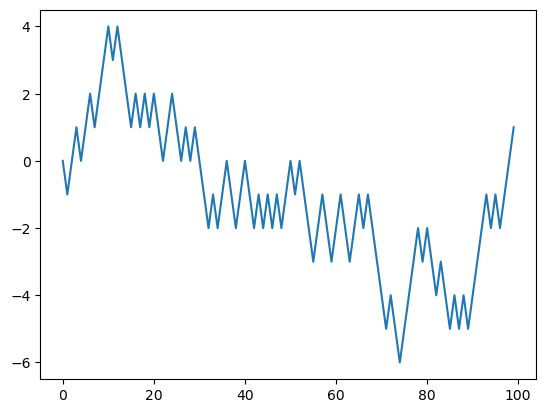

In [6]:
import matplotlib.pyplot as plt 

plt.plot(walk[:100])

In [9]:
import numpy as np

nsteps = 1000
rng = np.random.default_rng(seed=12345) # fresh random generator
draws = rng.integers(0, 2, size=nsteps)
steps = np.where(draws == 0, 1, -1)
walk = steps.cumsum()

In [11]:
walk.min()

-8

In [12]:
walk.max()

50

In [13]:
(np.abs(walk) >= 10).argmax()

155

In [14]:
nwalks = 5000
nsteps = 1000
draws = rng.integers(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(axis=1)
walks

array([[  1,   2,   3, ...,  22,  23,  22],
       [  1,   0,  -1, ..., -50, -49, -48],
       [  1,   2,   3, ...,  50,  49,  48],
       ...,
       [ -1,  -2,  -1, ..., -10,  -9, -10],
       [ -1,  -2,  -3, ...,   8,   9,   8],
       [ -1,   0,   1, ...,  -4,  -3,  -2]])

In [15]:
walks.min()

-120

In [16]:
walks.max()

114

In [17]:
hits30 = (np.abs(walks) >= 30).any(axis=1)
hits30

array([False,  True,  True, ...,  True, False,  True])

In [18]:
hits30.sum() # Number that hit 30 or -30

3395

In [19]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(axis=1)
crossing_times

array([201, 491, 283, ..., 219, 259, 541], dtype=int64)

In [20]:
crossing_times.mean()

500.5699558173785

In [21]:
draws = 0.25 * rng.standard_normal((nwalks, nsteps))
draws

array([[-0.04049737, -0.72203015, -0.25774138, ...,  0.42355751,
        -0.67303006, -0.41968018],
       [-0.04384188, -0.35375729,  0.27860676, ...,  0.01100176,
        -0.00527772, -0.08297507],
       [ 0.35227417, -0.35383118,  0.09818312, ..., -0.02725589,
        -0.04007853, -0.09849703],
       ...,
       [ 0.22455202, -0.12520673, -0.02435565, ..., -0.19437209,
        -0.20666754,  0.16508676],
       [-0.04544783,  0.2540093 , -0.298138  , ...,  0.467853  ,
         0.03529931, -0.18926481],
       [-0.10790612, -0.11282332, -0.05788132, ...,  0.11783678,
        -0.03052947,  0.18259634]])